# Industry Comparison

## Pseudocode
1. Download a month worth of trading data for AAPL, AJM and JLL.
2. Upload these CSVs before cleaning the data.
3. Plot the SD for each stock and the volumen. 
4. Prepare to use these plots to compare it against the sentiment analysis. 

In [321]:
import pandas as pd
import numpy as np
from pathlib import Path

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import hvplot.pandas

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read CSV Files into DataFrames

In [322]:
Compare_volume = Path("Compare_Volume_202207.csv")
Compare_volume_df = pd.read_csv(Compare_volume)
Compare_volume_df.head()

,Date,AAPL,AMJ,JLL
0,07/06/2022,74064250,405861,401118
1,07/05/2022,73429640,523628,393082
2,07/01/2022,71051550,449522,305767
3,06/30/2022,98964470,266226,675012
4,06/29/2022,66242410,335995,295287


Fix 'Date' for dataframe

In [323]:
Compare_volume_df['Date'] = pd.to_datetime(Compare_volume_df['Date']).dt.date
Compare_volume_df.set_index(Compare_volume_df['Date'], inplace=True)
Compare_volume_df.drop(columns=['Date'], inplace=True)
Compare_volume_df

,AAPL,AMJ,JLL
Date,,,
2022-07-06,74064250,405861,401118
2022-07-05,73429640,523628,393082
2022-07-01,71051550,449522,305767
2022-06-30,98964470,266226,675012
2022-06-29,66242410,335995,295287
2022-06-28,67315330,573233,327532
2022-06-27,70207910,906297,299118
2022-06-24,89116840,507874,432961
2022-06-23,72433770,593610,483854


In [324]:
#Compare_volume_df.set_index(pd.to_datetime(Compare_volume_df['Date'], infer_datetime_format=True), inplace=True)
Compare_volume_df.head()

,AAPL,AMJ,JLL
Date,,,
2022-07-06,74064250,405861,401118
2022-07-05,73429640,523628,393082
2022-07-01,71051550,449522,305767
2022-06-30,98964470,266226,675012
2022-06-29,66242410,335995,295287


In [325]:
Compare_volume_return = Compare_volume_df.pct_change()
Compare_volume_return.isnull().mean() * 100 
Compare__volume_return = Compare_volume_return.dropna().copy()
Compare_volume_return.isnull().sum()
Compare_volume_return

,AAPL,AMJ,JLL
Date,,,
2022-07-06,NaN,NaN,NaN
2022-07-05,-0.008568,0.290166,-0.020034
2022-07-01,-0.032386,-0.141524,-0.222129
2022-06-30,0.392854,-0.407758,1.207603
2022-06-29,-0.330645,0.262067,-0.562546
2022-06-28,0.016197,0.706076,0.109199
2022-06-27,0.042971,0.581027,-0.086752
2022-06-24,0.269328,-0.439616,0.447459
2022-06-23,-0.187204,0.168814,0.117546


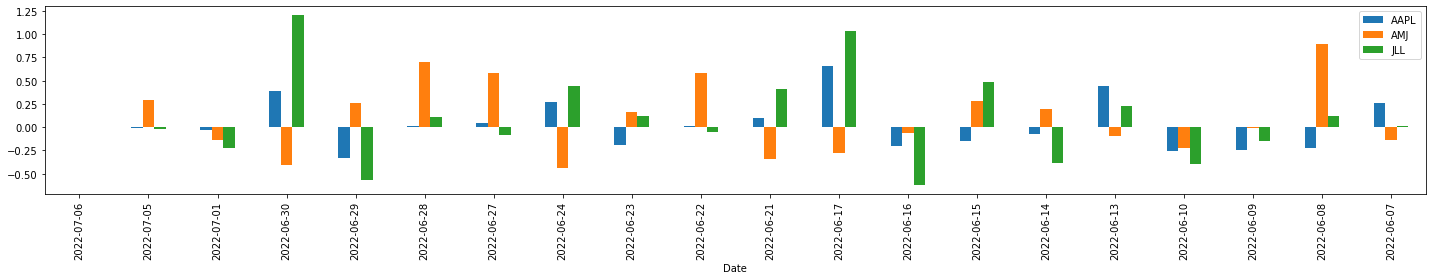

In [326]:
Compare_volume_return.plot.bar(figsize=(20,4),rot=90)
plt.tight_layout()
plt.savefig('Compare_volume.png')

## Compare Closing

### Read CSV Files into DataFrames

In [327]:
Compare_closing = Path("Compare_Closing_202207.csv")
Compare_closing_df = pd.read_csv(Compare_closing)
Compare_closing_df.head()

,Date,AAPL,AMJ,JLL
0,07/06/2022,$142.92,18.32,$173.04
1,07/05/2022,$141.56,18.66,$180.63
2,07/01/2022,$138.93,19.18,$181.17
3,06/30/2022,$136.72,18.96,$174.86
4,06/29/2022,$139.23,19.13,$176.63


Fix 'Date' for dataframe

In [328]:
Compare_closing_df['Date'] = pd.to_datetime(Compare_closing_df['Date']).dt.date
Compare_closing_df.set_index(Compare_closing_df['Date'], inplace=True)
Compare_closing_df.drop(columns=['Date'], inplace=True)
Compare_closing_df.head()

,AAPL,AMJ,JLL
Date,,,
2022-07-06,$142.92,18.32,$173.04
2022-07-05,$141.56,18.66,$180.63
2022-07-01,$138.93,19.18,$181.17
2022-06-30,$136.72,18.96,$174.86
2022-06-29,$139.23,19.13,$176.63


In [329]:
Compare_closing_df.dtypes

AAPL     object
AMJ     float64
JLL      object
dtype: object

Fix Data Types: Convert Closing Column to Float

In [330]:
Compare_closing_df ["AAPL"] = Compare_closing_df["AAPL"].str.replace("$", "", regex=True).str.replace(",","", regex=True).astype(float)
Compare_closing_df.dtypes

AAPL    float64
AMJ     float64
JLL      object
dtype: object

In [331]:
Compare_closing_df ["JLL"] = Compare_closing_df["JLL"].str.replace("$", "", regex=True).str.replace(",","", regex=True).astype(float)
Compare_closing_df.dtypes

AAPL    float64
AMJ     float64
JLL     float64
dtype: object

In [332]:
Compare_closing_returns = Compare_closing_df.pct_change()
Compare_closing_returns.head()

,AAPL,AMJ,JLL
Date,,,
2022-07-06,NaN,NaN,NaN
2022-07-05,-0.009516,0.018559,0.043863
2022-07-01,-0.018579,0.027867,0.002990
2022-06-30,-0.015907,-0.011470,-0.034829
2022-06-29,0.018359,0.008966,0.010122


In [333]:
Compare_closing_returns.isnull().mean() * 100 

AAPL    5.0
AMJ     5.0
JLL     5.0
dtype: float64

In [334]:
Compare_closing_returns = Compare_returns.dropna().copy()

In [335]:
Compare_closing_returns.isnull().sum()

AAPL    0
AMJ     0
JLL     0
dtype: int64

## Calculate and Plot Daily Returns

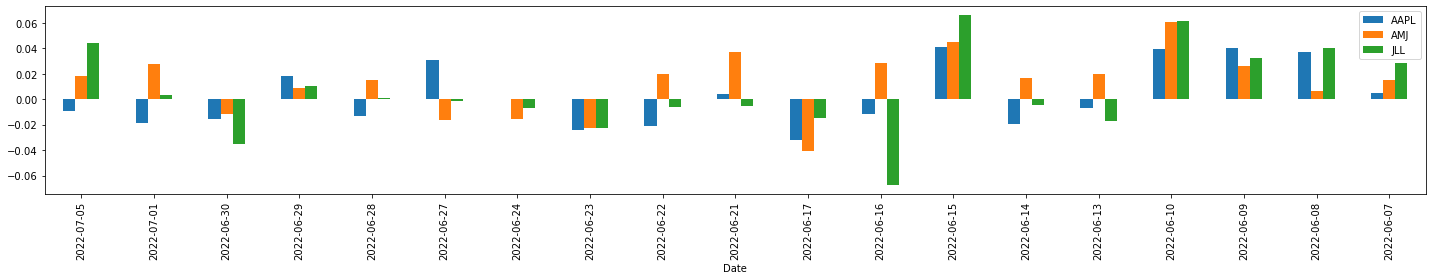

In [336]:
Compare_closing_returns.plot.bar(figsize=(20,4),rot=90)
plt.tight_layout()
plt.savefig('Compare_closing.png')

<Figure size 432x288 with 0 Axes>

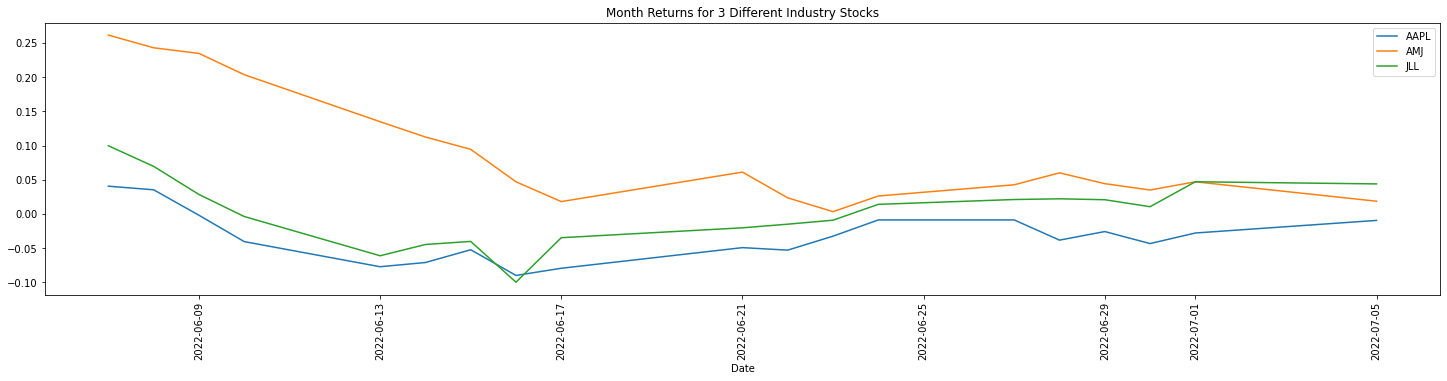

In [337]:
# Calculate cumulative returns of all portfolios
Compare_closing_returns = (1 + Compare_closing_returns).cumprod() - 1
Compare_closing_returns
# Plot Cumulative returns
plt.tight_layout()
Compare_closing_returns.plot(figsize=(25,5),rot=90, title="Month Returns for 3 Different Industry Stocks")
plt.savefig('Cumulative_returns_3_stock.png')